In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                     download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                      shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                    download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                     shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

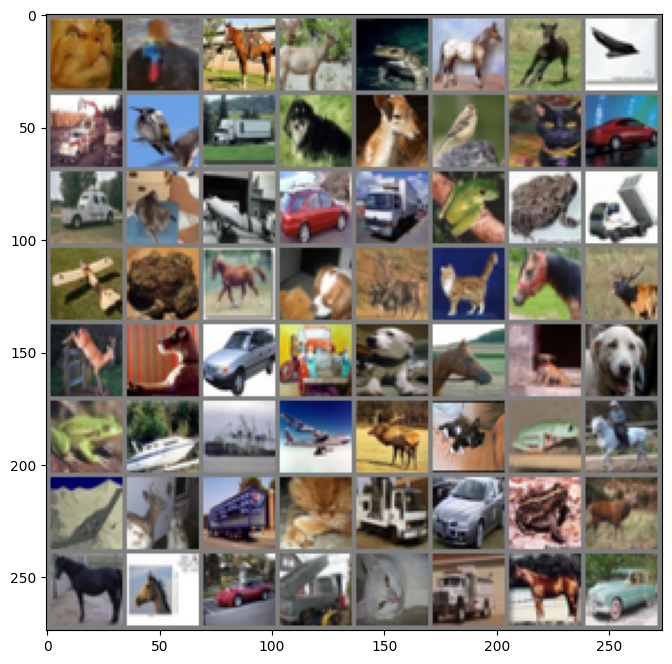

cat
bird
horse
deer
frog
horse
horse
plane


In [9]:
def imshow(img):
    plt.figure(figsize=(8,8))

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 这样运行会报错：images, labels = iter(testloader).next()
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

for j in range(8):
    print(classes[labels[j]])

In [10]:
class Net(nn.Module):
  def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [12]:
for epoch in range(10):

    for i, (inputs, labels) in enumerate(trainloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print('Epoch: %d Minibatch: %5d loss: %.3f' %(epoch + 1, i + 1, loss.item()))
print('Finished Training')

Epoch: 1 Minibatch:     1 loss: 2.304
Epoch: 1 Minibatch:   101 loss: 1.669
Epoch: 1 Minibatch:   201 loss: 1.571
Epoch: 1 Minibatch:   301 loss: 1.661
Epoch: 1 Minibatch:   401 loss: 1.689
Epoch: 1 Minibatch:   501 loss: 1.544
Epoch: 1 Minibatch:   601 loss: 1.510
Epoch: 1 Minibatch:   701 loss: 1.726
Epoch: 2 Minibatch:     1 loss: 1.385
Epoch: 2 Minibatch:   101 loss: 1.353
Epoch: 2 Minibatch:   201 loss: 1.241
Epoch: 2 Minibatch:   301 loss: 1.370
Epoch: 2 Minibatch:   401 loss: 1.361
Epoch: 2 Minibatch:   501 loss: 1.423
Epoch: 2 Minibatch:   601 loss: 1.285
Epoch: 2 Minibatch:   701 loss: 1.246
Epoch: 3 Minibatch:     1 loss: 1.235
Epoch: 3 Minibatch:   101 loss: 1.401
Epoch: 3 Minibatch:   201 loss: 1.229
Epoch: 3 Minibatch:   301 loss: 1.108
Epoch: 3 Minibatch:   401 loss: 0.996
Epoch: 3 Minibatch:   501 loss: 1.227
Epoch: 3 Minibatch:   601 loss: 1.192
Epoch: 3 Minibatch:   701 loss: 0.992
Epoch: 4 Minibatch:     1 loss: 0.956
Epoch: 4 Minibatch:   101 loss: 1.055
Epoch: 4 Min

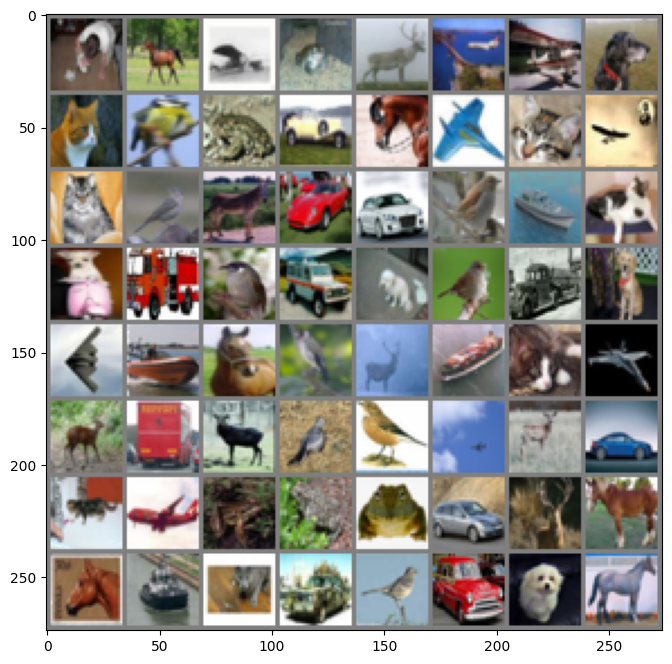

dog
horse
plane
frog
deer
plane
plane
dog


In [14]:
# 这样运行会报错：images, labels = iter(testloader).next()
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

for j in range(8):
    print(classes[labels[j]])

In [15]:
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

for j in range(8):
    print(classes[predicted[j]])

dog
deer
plane
cat
deer
plane
truck
bird


In [16]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %
